# **Assignment - Applied AI**

# 771767 - 2021/2022 

# **Topic : Feedforward Neural Nets with Hyperparameter Optimization**

Name: **Namitha Menon Kakkanat**

---
Student Id: **202117887**

---
Course : **Applied Artificial Intelligence**

---

Dataset : **Credit Card Fraud Dectection**



In [ ]:
# Mounting Google Drive
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#Importing Necessary Libraries 

from google.colab import files
import graphviz
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd 
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
        
#Importing library for Decision Tree classifer
from sklearn import tree
from sklearn import metrics 

import time                       #For calculating time
from tabulate import tabulate     #For creating table

#Importing library for Naive Bayes classifer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

#Importing library for Neural Network
import keras 
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from keras.optimizers import * 
from keras.utils import np_utils

#Importing library for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    #Import scikit-learn metrics module for accuracy calculation

# **Data Processing**

In [129]:
credit_data=pd.read_csv('gdrive/My Drive/Colab Notebooks/771767_A21_T2:Applied_AI/creditcard.csv')
credit_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Plotting the variables using subplots**

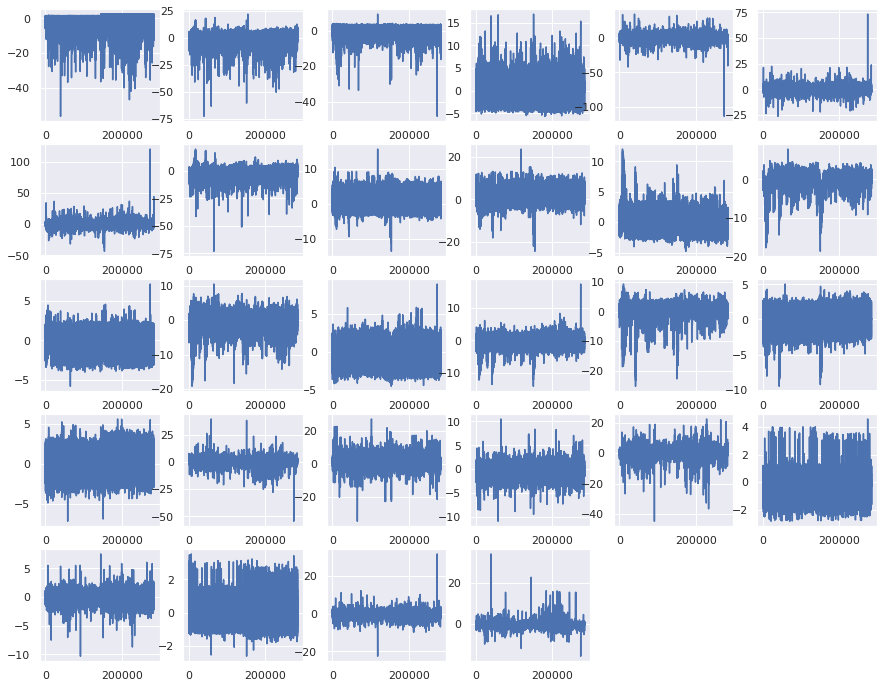

In [130]:
fig = plt.figure(figsize = (15, 12))

plt.subplot(5, 6, 1) ; plt.plot(credit_data.V1) ; plt.subplot(5, 6, 15) ; plt.plot(credit_data.V15)
plt.subplot(5, 6, 2) ; plt.plot(credit_data.V2) ; plt.subplot(5, 6, 16) ; plt.plot(credit_data.V16)
plt.subplot(5, 6, 3) ; plt.plot(credit_data.V3) ; plt.subplot(5, 6, 17) ; plt.plot(credit_data.V17)
plt.subplot(5, 6, 4) ; plt.plot(credit_data.V4) ; plt.subplot(5, 6, 18) ; plt.plot(credit_data.V18)
plt.subplot(5, 6, 5) ; plt.plot(credit_data.V5) ; plt.subplot(5, 6, 19) ; plt.plot(credit_data.V19)
plt.subplot(5, 6, 6) ; plt.plot(credit_data.V6) ; plt.subplot(5, 6, 20) ; plt.plot(credit_data.V20)
plt.subplot(5, 6, 7) ; plt.plot(credit_data.V7) ; plt.subplot(5, 6, 21) ; plt.plot(credit_data.V21)
plt.subplot(5, 6, 8) ; plt.plot(credit_data.V8) ; plt.subplot(5, 6, 22) ; plt.plot(credit_data.V22)
plt.subplot(5, 6, 9) ; plt.plot(credit_data.V9) ; plt.subplot(5, 6, 23) ; plt.plot(credit_data.V23)
plt.subplot(5, 6, 10) ; plt.plot(credit_data.V10) ; plt.subplot(5, 6, 24) ; plt.plot(credit_data.V24)
plt.subplot(5, 6, 11) ; plt.plot(credit_data.V11) ; plt.subplot(5, 6, 25) ; plt.plot(credit_data.V25)
plt.subplot(5, 6, 12) ; plt.plot(credit_data.V12) ; plt.subplot(5, 6, 26) ; plt.plot(credit_data.V26)
plt.subplot(5, 6, 13) ; plt.plot(credit_data.V13) ; plt.subplot(5, 6, 27) ; plt.plot(credit_data.V27)
plt.subplot(5, 6, 14) ; plt.plot(credit_data.V14) ; plt.subplot(5, 6, 28) ; plt.plot(credit_data.V28)
plt.show()

# **Data Cleaning**

In [ ]:
credit_data.isnull().sum()

V1                  0
V2                  0
V3                  0
V4                  0
V5                  0
V6                  0
V7                  0
V8                  0
V9                  0
V10                 0
V11                 0
V12                 0
V13                 0
V14                 0
V15                 0
V16                 0
V17                 0
V18                 0
V19                 0
V20                 0
V21                 0
V22                 0
V23                 0
V24                 0
V25                 0
V26                 0
V27                 0
V28                 0
Class               0
NormalizedAmount    0
dtype: int64

In [ ]:
credit_data.isnull()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [131]:
#Creating X axis & Y axis data 
#Y axis data from feature class => Feature 'Class' is the response variable ( it takes value 1 in case of fraud and 0 otherwise),
Y_credit=credit_data['Class']
Y_credit=Y_credit.astype('int')
Y_credit.unique()


array([0, 1])

In [132]:
#X axis data from the Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been 
#Transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the 
#first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant 
#cost-sensitive learning. 
X_credit  = credit_data.drop(['Class'], axis = 1)
X_credit = np.asarray(X_credit).astype('float32')
X_credit

array([[ 0.0000000e+00, -1.3598071e+00, -7.2781175e-02, ...,
         1.3355838e-01, -2.1053053e-02,  1.4962000e+02],
       [ 0.0000000e+00,  1.1918571e+00,  2.6615071e-01, ...,
        -8.9830989e-03,  1.4724169e-02,  2.6900001e+00],
       [ 1.0000000e+00, -1.3583541e+00, -1.3401631e+00, ...,
        -5.5352796e-02, -5.9751842e-02,  3.7866000e+02],
       ...,
       [ 1.7278800e+05,  1.9195650e+00, -3.0125386e-01, ...,
         4.4547720e-03, -2.6560828e-02,  6.7879997e+01],
       [ 1.7278800e+05, -2.4044006e-01,  5.3048253e-01, ...,
         1.0882074e-01,  1.0453282e-01,  1.0000000e+01],
       [ 1.7279200e+05, -5.3341252e-01, -1.8973334e-01, ...,
        -2.4153087e-03,  1.3648914e-02,  2.1700000e+02]], dtype=float32)

**Split** **Data**

In [133]:
#Create test and train X and Y axis data sets from the CSV data

X_train, X_test, y_train, y_test = train_test_split(X_credit, Y_credit, test_size=0.30, random_state=0)
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))
print("Shape of training data : "+str(X_train.shape))
print("Shape of test data : "+str(X_test.shape))

Length of X_train is: 199364
Length of X_test is: 85443
Length of y_train is: 199364
Length of y_test is: 85443
Shape of training data : (199364, 30)
Shape of test data : (85443, 30)


In [134]:
print("Train data\n")
print(X_train)
print(y_train)
print("\n")
print("Test data\n")
print(X_test)
print(y_test)

Train data

[[ 1.13921000e+05 -1.32066265e-01  1.07043549e-01 ...  3.06394666e-01
   7.48169646e-02  4.78899994e+01]
 [ 1.35319000e+05  2.12599444e+00  1.42074060e-02 ... -6.82673827e-02
  -5.76775894e-02  1.98000002e+00]
 [ 1.25498000e+05 -8.66939723e-02  1.66240215e-01 ... -1.20157063e+00
  -1.13993073e+00  1.70100006e+02]
 ...
 [ 7.66160000e+04  1.51260233e+00 -9.49435294e-01 ... -1.41537085e-03
   3.66494409e-03  3.49000015e+01]
 [ 9.72530000e+04  1.79886329e+00 -1.69979072e+00 ... -3.36155817e-02
  -3.24705131e-02  1.71309998e+02]
 [ 7.48870000e+04 -5.89399695e-01  7.47828364e-01 ...  8.65917876e-02
   1.18083775e-01  1.59899998e+01]]
161145    0
204520    0
182659    0
25117     0
227642    0
         ..
211543    0
86293     0
122579    0
152315    0
117952    0
Name: Class, Length: 199364, dtype: int64


Test data

[[ 1.2582100e+05 -3.2333356e-01  1.0574553e+00 ...  1.0849443e-01
   1.6113916e-01  4.0000000e+01]
 [ 1.5723500e+05 -3.4971839e-01  9.3261856e-01 ...  7.6830029e-02


# **FEED FORWARD NEURAL NETWORK**

> **Create Model**

In [ ]:
neural_start_time = time.time()
nn_model = Sequential()
nn_model.add(Dense(units=1000, activation='relu', input_shape=(29,)))
nn_model.add(Dropout(0.1))
nn_model.add(Dense(units=1000, activation='relu'))
nn_model.add(Dropout(0.1))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1000)              30000     
                                                                 
 dropout_4 (Dropout)         (None, 1000)              0         
                                                                 
 dense_7 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_5 (Dropout)         (None, 1000)              0         
                                                                 
 dense_8 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 1,032,001
Trainable params: 1,032,001
Non-trainable params: 0
_________________________________________________________________



> **Fit Model**




In [ ]:
nn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = nn_model.fit(X_train, y_train,batch_size=16,epochs=10,verbose=1,validation_data=(X_test, y_test))

Epoch 1/10
12461/12461 [==============================] - 197s 16ms/step - loss: 5.1045 - accuracy: 0.9971 - val_loss: 0.0202 - val_accuracy: 0.9983
Epoch 2/10
12461/12461 [==============================] - 199s 16ms/step - loss: 0.0925 - accuracy: 0.9980 - val_loss: 0.0221 - val_accuracy: 0.9983
Epoch 3/10
12461/12461 [==============================] - 195s 16ms/step - loss: 0.3022 - accuracy: 0.9979 - val_loss: 0.0794 - val_accuracy: 0.9983
Epoch 4/10
12461/12461 [==============================] - 191s 15ms/step - loss: 0.2508 - accuracy: 0.9977 - val_loss: 0.0140 - val_accuracy: 0.9983
Epoch 5/10
12461/12461 [==============================] - 181s 15ms/step - loss: 0.0849 - accuracy: 0.9981 - val_loss: 0.0223 - val_accuracy: 0.9983
Epoch 6/10
12461/12461 [==============================] - 174s 14ms/step - loss: 0.1206 - accuracy: 0.9982 - val_loss: 0.1648 - val_accuracy: 0.9983
Epoch 7/10
12461/12461 [==============================] - 173s 14ms/step - loss: 0.1122 - accuracy: 0.9981

> **Evaluate Model**

In [46]:
score = nn_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.021620292216539383
Test accuracy: 0.9982795715332031




> **Plot** **Result**



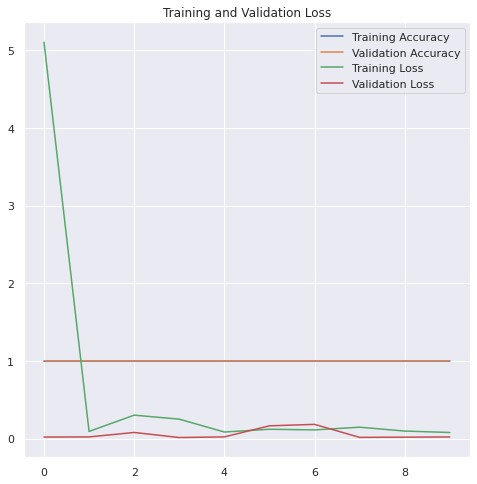

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **DECISION TREE CLASSIFIER**



>**Building the Decision Tree Model**



In [143]:
decision_start_time = time.time()

# Create Decision Tree classifer object
decision_model = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
decision_model = decision_model.fit(X_train,y_train)

#Predict the response for test dataset
y_test_pred = decision_model.predict(X_test)

# Create Decision Tree classifer object
decision_model = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
decision_model = decision_model.fit(X_test,y_test)

#Predict the response for train dataset
y_train_pred = decision_model.predict(X_train)




> **Evaluate the Model**



In [50]:
#Comparing actual test set values and predicted values

# Model Accuracy
decision_train_Accuracy=metrics.accuracy_score(y_train, y_train_pred)
decision_test_Accuracy=metrics.accuracy_score(y_test, y_test_pred)
decision_training_time=(time. time() - decision_start_time)

print("Decision Train Accuracy:",decision_train_Accuracy)
print("Decision Test Accuracy:",decision_test_Accuracy)
print("--- %s seconds ---" % decision_training_time)

Decision Train Accuracy: 0.9990419534118496
Decision Test Accuracy: 0.9993211848834895
--- 26.951398611068726 seconds ---




> **Plot Result**


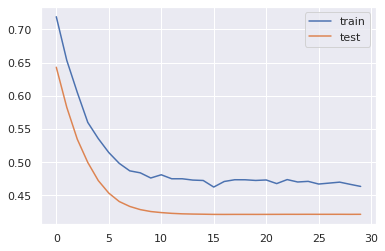

In [145]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(history.history['loss'], label='train')

plt.plot(history.history['val_loss'], label='test')

plt.legend()

plt.show()

In [144]:
!pip install graphviz

In [148]:
dot_data = tree.export_graphviz(decision_model, out_file=None,
feature_names=['Time','v1','v2','v3','v4','v5','v6','v7','v7','v9','v10','v11','v12','v13','v14','v15','v16','v17','v18','v19','v20','v21','v22','v23','v24','v25','v26','v27','v29','Amount',],
class_names=list(['Time','v1','v2','v3','v4','v5','v6','v7','v7','v9','v10','v11','v12','v13','v14','v15','v16','v17','v18','v19','v20','v21','v22','v23','v24','v25','v26','v27','v29','Amount',]),
filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

#download image
graph.render("decision_tree_graphivz")
files.download("decision_tree_graphivz.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **NAIVE BAYES CLASSIFIER**

**Build the Naive Bayes Model**

In [138]:
# Init the Gaussian Classifier
nb_model = GaussianNB()

# Train the model 
nb_model.fit(X_train, y_train)

# Predict Output 
y_naive_pred_test = nb_model.predict(X_test)

# Init the Gaussian Classifier
train_model = GaussianNB()

# Train the model 
train_model.fit(X_test, y_test)

# Predict Output 
y_naive_pred_train = train_model.predict(X_train)

**Evaluate the Model**

In [139]:
# Model Accuracy
naive_train_Accuracy=metrics.accuracy_score(y_train, y_naive_pred_train)
naive_test_Accuracy=metrics.accuracy_score(y_test, y_naive_pred_test)

print("Naive Test Accuracy:",naive_train_Accuracy)
print("Naive Train Accuracy:",naive_test_Accuracy)

Naive Test Accuracy: 0.9931883389177585
Naive Train Accuracy: 0.9930011820745994


**Plot the Result**

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.15      0.65      0.24       147

    accuracy                           0.99     85443
   macro avg       0.57      0.82      0.62     85443
weighted avg       1.00      0.99      1.00     85443



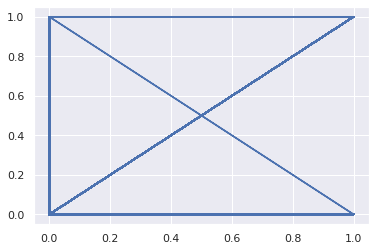

In [142]:
print(metrics.classification_report(y_test, y_naive_pred_test))
plt.plot(y_test, y_naive_pred_test)

plt.show()

# **RANDOM FOREST CLASSIFIER**

**Build & Evaluate the Random Forest Model**

In [136]:
#Create a Random Forest Classifier

clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.9995084442259752


**Plot the Result**

Accuracy: 0.9995084442259752


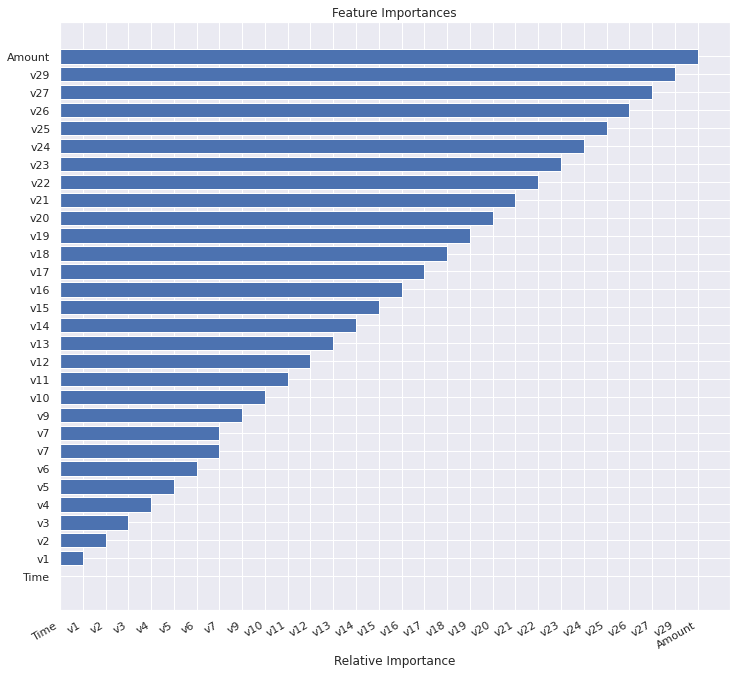

In [137]:
# plot training history

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
plot_randomforest=plt.figure(figsize=(12,12))
plot_randomforest=plt.title('Feature Importances')

plot_randomforest=plt.barh(range(len(['Time','v1','v2','v3','v4','v5','v6','v7','v7','v9','v10','v11','v12','v13','v14','v15','v16','v17','v18','v19','v20','v21','v22','v23','v24','v25','v26','v27','v29','Amount',])), ['Time','v1','v2','v3','v4','v5','v6','v7','v7','v9','v10','v11','v12','v13','v14','v15','v16','v17','v18','v19','v20','v21','v22','v23','v24','v25','v26','v27','v29','Amount'], color='b', align='center')
plot_randomforest=plt.yticks(range(len(['Time','v1','v2','v3','v4','v5','v6','v7','v7','v9','v10','v11','v12','v13','v14','v15','v16','v17','v18','v19','v20','v21','v22','v23','v24','v25','v26','v27','v29','Amount',])), ['Time','v1','v2','v3','v4','v5','v6','v7','v7','v9','v10','v11','v12','v13','v14','v15','v16','v17','v18','v19','v20','v21','v22','v23','v24','v25','v26','v27','v29','Amount',])
plot_randomforest=plt.xlabel('Relative Importance')
plot_randomforest.get_figure().autofmt_xdate()

# UNDER SAMPLING METHOD

There are two techniques to tackle class imbalance, under-sampling, and over-sampling. Here we use Undersampling method

**Note - sampling is performed before data spliting which should be the case if future data is unbalanced, otherwise, sampling needs to be performed only on train set.**

In [90]:
fraud_index = np.array(credit_data[credit_data.Class == 1].index)
frauds_no= len(fraud_index)

normal_index = np.array(credit_data[credit_data.Class == 0].index)
normal_no = len(normal_index)

print("Total Number of Normal Data:",normal_no)
print("Total Number of Fraud Data : ", frauds_no)

Total Number of Normal Data: 284315
Total Number of Fraud Data :  492


**Create New Dataset from existing dataset**

In [149]:
credit_dataSampleNotFraud=credit_data[credit_data["Class"].isin([0])]
credit_dataSampleNotFraud=credit_dataSampleNotFraud.sample(n=2508)

credit_dataSample=credit_data.copy()
credit_dataSampleFraud=credit_data[credit_data["Class"].isin([1])]

print("Total Number of Normal Data:",len(credit_dataSampleNotFraud))
print("Total Number of Fraud Data:",len(credit_dataSampleFraud))

Total Number of Normal Data: 2508
Total Number of Fraud Data: 492


# **DATA PREPROCESSING**

In [150]:
frames = [credit_dataSampleNotFraud, credit_dataSampleFraud]

new_credit_data = pd.concat(frames)

new_credit_data.reset_index(inplace=True,drop=True)
display((new_credit_data).head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,73358.0,0.996326,-1.037305,0.046645,-1.019692,-0.298546,1.192329,-0.630693,0.386333,1.967784,...,-0.121127,-0.293312,-0.338080,-1.683625,0.618655,-0.623685,0.081146,0.025299,140.99,0
1,77387.0,1.204209,0.175654,0.611244,0.556725,-0.560851,-0.795953,-0.067698,-0.046301,-0.161670,...,-0.197870,-0.630069,0.155305,0.518217,0.145421,0.066031,-0.035343,0.009825,0.99,0
2,151019.0,-2.218371,0.845433,-1.280711,-0.585231,2.179790,0.067186,0.510032,0.904038,-1.421588,...,0.423592,1.177692,-1.084748,-1.504678,1.414456,0.444529,0.042937,-0.331718,5.92,0
3,77085.0,-0.845259,1.185329,0.779094,-0.989750,0.668186,-0.006754,0.460673,-0.574037,-0.260058,...,0.487310,-1.111835,-0.047021,-0.947755,-0.173904,-0.053052,0.333377,0.180284,5.99,0
4,36122.0,-1.566983,0.073766,2.399317,0.431354,0.054112,2.026338,-0.411201,0.697581,1.140478,...,-0.144547,0.359667,-0.084026,-0.549121,-0.491289,0.345687,0.138533,0.204048,60.00,0


In [151]:
new_credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,91498.076333,-0.779322,0.603422,-1.115925,0.718148,-0.497364,-0.223758,-0.933552,0.045777,-0.429147,...,0.124553,-0.022780,-0.002906,-0.003109,0.008240,0.018950,0.027106,0.012219,90.678597,0.164000
std,48334.976819,3.703174,2.693435,4.092891,2.413546,2.742516,1.538623,3.742830,3.234766,1.692839,...,1.839631,0.921733,0.831917,0.597012,0.569743,0.491133,0.656845,0.371073,248.121404,0.370337
min,12.000000,-30.552380,-35.097685,-31.103685,-4.704106,-22.105532,-10.781989,-43.557242,-73.216718,-13.434066,...,-34.830382,-8.887017,-19.254328,-2.761047,-4.781606,-1.354976,-7.263482,-4.191222,0.000000,0.000000
25%,49541.500000,-1.275403,-0.475072,-1.483053,-0.698086,-0.871804,-0.952465,-0.880386,-0.214937,-0.943518,...,-0.221745,-0.569952,-0.187530,-0.343484,-0.326224,-0.316512,-0.072517,-0.052712,4.490000,0.000000
50%,82849.000000,-0.253899,0.266673,-0.093265,0.219214,-0.152122,-0.392249,-0.080478,0.045008,-0.197196,...,0.003448,-0.016518,-0.010082,0.039034,0.025394,-0.023683,0.012121,0.016590,20.000000,0.000000
75%,137695.250000,1.235568,1.137126,0.846880,1.286643,0.581847,0.279532,0.497406,0.451766,0.476274,...,0.276486,0.520698,0.166784,0.424525,0.358955,0.304426,0.176411,0.109924,80.000000,0.000000
max,172353.000000,2.394434,22.057729,3.442342,12.114672,17.370895,16.614054,18.822654,20.007208,5.872938,...,27.202839,10.503090,10.760604,3.450094,3.347936,2.859167,3.052358,7.512250,4905.000000,1.000000


**Plotting the variables using subplots**

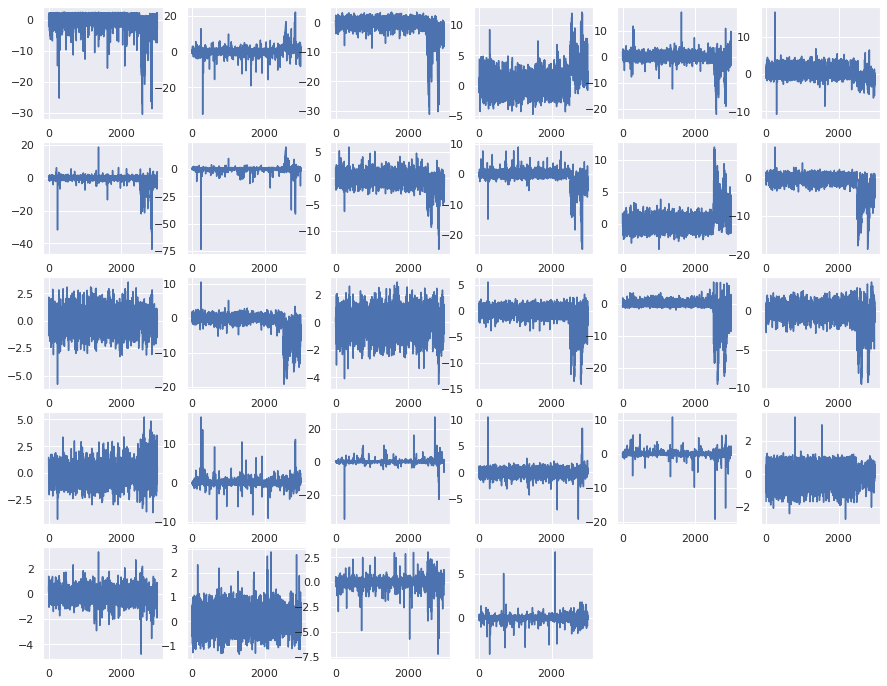

In [152]:
fig = plt.figure(figsize = (15, 12))

plt.subplot(5, 6, 1) ; plt.plot(new_credit_data.V1) ; plt.subplot(5, 6, 15) ; plt.plot(new_credit_data.V15)
plt.subplot(5, 6, 2) ; plt.plot(new_credit_data.V2) ; plt.subplot(5, 6, 16) ; plt.plot(new_credit_data.V16)
plt.subplot(5, 6, 3) ; plt.plot(new_credit_data.V3) ; plt.subplot(5, 6, 17) ; plt.plot(new_credit_data.V17)
plt.subplot(5, 6, 4) ; plt.plot(new_credit_data.V4) ; plt.subplot(5, 6, 18) ; plt.plot(new_credit_data.V18)
plt.subplot(5, 6, 5) ; plt.plot(new_credit_data.V5) ; plt.subplot(5, 6, 19) ; plt.plot(new_credit_data.V19)
plt.subplot(5, 6, 6) ; plt.plot(new_credit_data.V6) ; plt.subplot(5, 6, 20) ; plt.plot(new_credit_data.V20)
plt.subplot(5, 6, 7) ; plt.plot(new_credit_data.V7) ; plt.subplot(5, 6, 21) ; plt.plot(new_credit_data.V21)
plt.subplot(5, 6, 8) ; plt.plot(new_credit_data.V8) ; plt.subplot(5, 6, 22) ; plt.plot(new_credit_data.V22)
plt.subplot(5, 6, 9) ; plt.plot(new_credit_data.V9) ; plt.subplot(5, 6, 23) ; plt.plot(new_credit_data.V23)
plt.subplot(5, 6, 10) ; plt.plot(new_credit_data.V10) ; plt.subplot(5, 6, 24) ; plt.plot(new_credit_data.V24)
plt.subplot(5, 6, 11) ; plt.plot(new_credit_data.V11) ; plt.subplot(5, 6, 25) ; plt.plot(new_credit_data.V25)
plt.subplot(5, 6, 12) ; plt.plot(new_credit_data.V12) ; plt.subplot(5, 6, 26) ; plt.plot(new_credit_data.V26)
plt.subplot(5, 6, 13) ; plt.plot(new_credit_data.V13) ; plt.subplot(5, 6, 27) ; plt.plot(new_credit_data.V27)
plt.subplot(5, 6, 14) ; plt.plot(new_credit_data.V14) ; plt.subplot(5, 6, 28) ; plt.plot(new_credit_data.V28)
plt.show()

# **DATA CLEANING**

In [97]:
new_credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [99]:
new_credit_data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [153]:
#Creating X axis & Y axis data 
#Y axis data from feature class => Feature 'Class' is the response variable ( it takes value 1 in case of fraud and 0 otherwise),
Y_new_credit=new_credit_data['Class']
Y_new_credit=Y_new_credit.astype('int')
Y_new_credit.unique()

array([0, 1])

In [154]:
#X axis data from the Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been 
#Transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the 
#first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant 
#cost-sensitive learning. 
X_new_credit  = new_credit_data.drop(['Class'], axis = 1)
X_new_credit = np.asarray(X_new_credit).astype('float32')
X_new_credit

array([[ 7.3358000e+04,  9.9632573e-01, -1.0373052e+00, ...,
         8.1146047e-02,  2.5298910e-02,  1.4099001e+02],
       [ 7.7387000e+04,  1.2042094e+00,  1.7565370e-01, ...,
        -3.5343423e-02,  9.8250741e-03,  9.9000001e-01],
       [ 1.5101900e+05, -2.2183707e+00,  8.4543318e-01, ...,
         4.2936798e-02, -3.3171776e-01,  5.9200001e+00],
       ...,
       [ 1.6935100e+05, -6.7614269e-01,  1.1263660e+00, ...,
         3.8510746e-01,  1.9436148e-01,  7.7889999e+01],
       [ 1.6996600e+05, -3.1138315e+00,  5.8586419e-01, ...,
         8.8487554e-01, -2.5370032e-01,  2.4500000e+02],
       [ 1.7034800e+05,  1.9919761e+00,  1.5847589e-01, ...,
         2.9875822e-03, -1.5308813e-02,  4.2529999e+01]], dtype=float32)

**SPLIT DATA**

In [155]:
#Create test and train X and Y axis data sets from the CSV data

X_train, X_test, y_train, y_test = train_test_split(X_new_credit, Y_new_credit, test_size=0.30, random_state=0)
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))
print("Shape of training data : "+str(X_train.shape))
print("Shape of test data : "+str(X_test.shape))

Length of X_train is: 2100
Length of X_test is: 900
Length of y_train is: 2100
Length of y_test is: 900
Shape of training data : (2100, 30)
Shape of test data : (900, 30)


In [156]:
print("Train data\n")
print(X_train)
print(y_train)
print("\n")
print("Test data\n")
print(X_test)
print(y_test)

Train data

[[ 5.5043000e+04 -6.0876805e-01  1.4358747e+00 ... -6.9096702e-01
  -8.2584456e-02  2.0000000e+00]
 [ 6.6950000e+04 -7.4020815e-01  3.9848838e-02 ...  2.9000861e-03
   6.5385692e-02  5.7980000e+01]
 [ 1.0584000e+05 -4.9767599e-01  8.8700384e-01 ... -7.1120165e-02
  -1.4454968e-01  2.1199999e+00]
 ...
 [ 1.7545000e+04  1.1628159e+00  2.9596397e-01 ... -1.3570605e-03
  -1.5543140e-03  9.8999996e+00]
 [ 3.5942000e+04 -4.1940737e+00  4.3828974e+00 ...  4.7393423e-01
   4.7375748e-01  1.4460000e+01]
 [ 6.7857000e+04 -1.7393337e+00 -1.3046546e+00 ...  3.1632621e-02
   6.6279687e-02  3.2000000e+02]]
1732    0
2440    0
1232    0
1081    0
2920    1
       ..
763     0
835     0
1653    0
2607    1
2732    1
Name: Class, Length: 2100, dtype: int64


Test data

[[ 6.9532000e+04 -9.8917627e+00 -1.2068938e+01 ...  1.7426024e-01
  -1.9504436e+00  1.0590000e+01]
 [ 1.7043000e+05 -4.3240738e-01  1.8578154e-01 ...  9.8962538e-02
   1.6533729e-01  2.9950001e+01]
 [ 1.4500000e+02 -2.4204128

# **FEED FORWARD NEURAL NETWORK**

**CREATE MODEL**

1. **Dense Layers:-** 3 - 

    *  **Activation:-** relu,relu,sigmoid

2. **Drop layers:-** 2

3. **Learning rate:-**=0.01

4. **Optimizer:-**  adam

5. **epochs:-**5

6. **batch_size:-**16

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 1000)              31000     
                                                                 
 dropout_70 (Dropout)        (None, 1000)              0         
                                                                 
 dense_91 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_71 (Dropout)        (None, 1000)              0         
                                                                 
 dense_92 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 1,033,001
Trainable params: 1,033,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
132/132 [========================

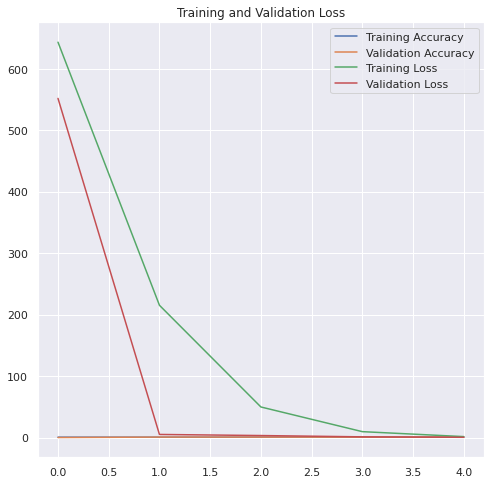

In [34]:
neural_start_time = time.time()
nn_model = Sequential()
nn_model.add(Dense(units=1000, activation='relu', input_shape=(30,)))
nn_model.add(Dropout(0.1))
nn_model.add(Dense(units=1000, activation='relu'))
nn_model.add(Dropout(0.1))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.summary()

#FIT MODEL
learning_rate=0.01
nn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = nn_model.fit(X_train, y_train,batch_size=16,epochs=5,verbose=1,validation_data=(X_test, y_test))

#EVALUATE MODEL
score = nn_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#PLOT THE RESULT
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(5)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **HYPER PARAMETER OPTIMISATION**

# **Method 1 :**
*Hyper Parameter Tunning*:-

1. **Dense Layers:-** 5 - 

    *  **Activation:-** sigmoid

2. **Drop layers:-** 2

3. **Learning rate:-**=0.3

4. **Optimizer:-**  Adadelta

5. **epochs:-**20

6. **batch_size:-**16

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_184 (Dense)           (None, 1000)              31000     
                                                                 
 dropout_114 (Dropout)       (None, 1000)              0         
                                                                 
 dense_185 (Dense)           (None, 100)               100100    
                                                                 
 dropout_115 (Dropout)       (None, 100)               0         
                                                                 
 dense_186 (Dense)           (None, 100)               10100     
                                                                 
 dense_187 (Dense)           (None, 100)               10100     
                                                                 
 dense_188 (Dense)           (None, 1)               

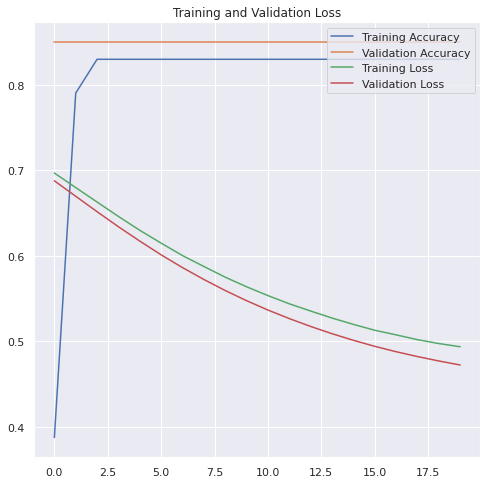

In [54]:
neural_start_time = time.time()
nn_model = Sequential()
nn_model.add(Dense(units=1000, activation='sigmoid', input_shape=(30,)))
nn_model.add(Dropout(0.1))
nn_model.add(Dense(units=100, activation='sigmoid'))
nn_model.add(Dropout(0.1))
nn_model.add(Dense(units=100, activation='sigmoid'))
#nn_model.add(Dropout(0.1))
nn_model.add(Dense(units=100, activation='sigmoid'))
##nn_model.add(Dropout(0.1))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.summary()

#FIT MODEL
learning_rate=0.3
nn_model.compile(optimizer='Adadelta',loss='binary_crossentropy',metrics=['accuracy'])
history = nn_model.fit(X_train, y_train,batch_size=16,epochs=20,verbose=1,validation_data=(X_test, y_test))

#EVALUATE MODEL
score = nn_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#PLOT THE RESULT
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **Method 2 :**
*Hyper Parameter Tunning*:-

1. **Dense Layers:-** 5 - 

    *  **Activation:-** relu, sigmoid, sigmoid , sigmoid , sigmoid

2. **Drop layers:-** 2

3. **Learning rate:-**=0.0

4. **Optimizer:-**  adam

5. **epochs:-**20

6. **batch_size:-**16

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 1000)              31000     
                                                                 
 dropout_32 (Dropout)        (None, 1000)              0         
                                                                 
 dense_59 (Dense)            (None, 24)                24024     
                                                                 
 dropout_33 (Dropout)        (None, 24)                0         
                                                                 
 dense_60 (Dense)            (None, 20)                500       
                                                                 
 dense_61 (Dense)            (None, 24)                504       
                                                                 
 dense_62 (Dense)            (None, 1)               

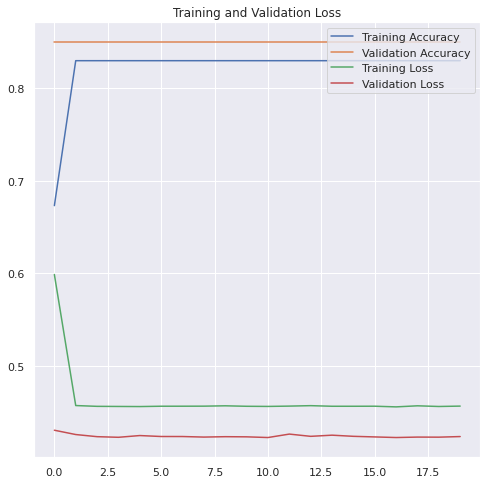

In [127]:
neural_start_time = time.time()
nn_model = Sequential()
nn_model.add(Dense(units=1000, activation='relu', input_shape=(30,)))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(units=24, activation='sigmoid'))
nn_model.add(Dropout(0.1))
nn_model.add(Dense(units=20, activation='sigmoid'))
#nn_model.add(Dropout(0.1))
nn_model.add(Dense(units=24, activation='sigmoid'))
#nn_model.add(Dropout(0.1))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.summary()

#FIT MODEL
nn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = nn_model.fit(X_train, y_train,batch_size=16,epochs=20,verbose=1,validation_data=(X_test, y_test))

#EVALUATE MODEL
score = nn_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#PLOT THE RESULT
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(20)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **Method 3 :**
*Hyper Parameter Tunning*:-

1. **Dense Layers:-** 3 - 

    *  **Activation:-** sigmoid , sigmoid , sigmoid

2. **Drop layers:-** 2

3. **Learning rate:-**=0.0

4. **Optimizer:-**  Adadelta

5. **epochs:-**10

6. **batch_size:-**16

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_161 (Dense)           (None, 1000)              31000     
                                                                 
 dropout_104 (Dropout)       (None, 1000)              0         
                                                                 
 dense_162 (Dense)           (None, 1000)              1001000   
                                                                 
 dropout_105 (Dropout)       (None, 1000)              0         
                                                                 
 dense_163 (Dense)           (None, 1)                 1001      
                                                                 
Total params: 1,033,001
Trainable params: 1,033,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
132/132 [=======================

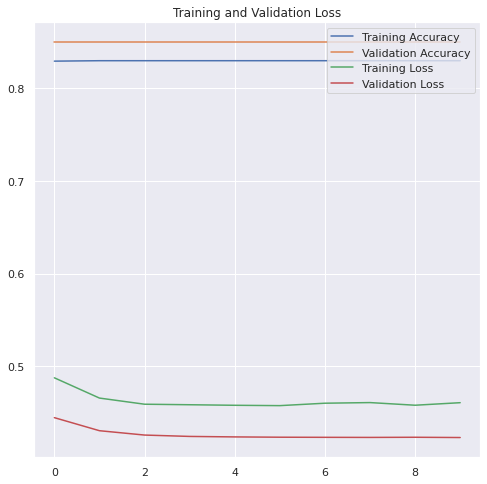

In [49]:
neural_start_time = time.time()
model = Sequential()
model.add(Dense(units=1000, activation='sigmoid', input_shape=(30,)))
model.add(Dropout(0.1))
model.add(Dense(units=1000, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='Adadelta',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, y_train,batch_size=16,epochs=10,verbose=1,validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)


print('Test loss:', score[0])
print('Test accuracy:', score[1])


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **Method 4 :**
*Hyper Parameter Tunning*:-

1. **Dense Layers:-** 5 - 

    *  **Activation:-** sigmoid , relu , relu,relu,sigmoid

2. **Drop layers:-** 4

3. **Learning rate:-**=0.09

4. **Optimizer:-**  Adadelta

5. **epochs:-**25

6. **batch_size:-**17

Model: "sequential_96"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_471 (Dense)           (None, 1000)              31000     
                                                                 
 dropout_327 (Dropout)       (None, 1000)              0         
                                                                 
 dense_472 (Dense)           (None, 100)               100100    
                                                                 
 dropout_328 (Dropout)       (None, 100)               0         
                                                                 
 dense_473 (Dense)           (None, 100)               10100     
                                                                 
 dropout_329 (Dropout)       (None, 100)               0         
                                                                 
 dense_474 (Dense)           (None, 100)             

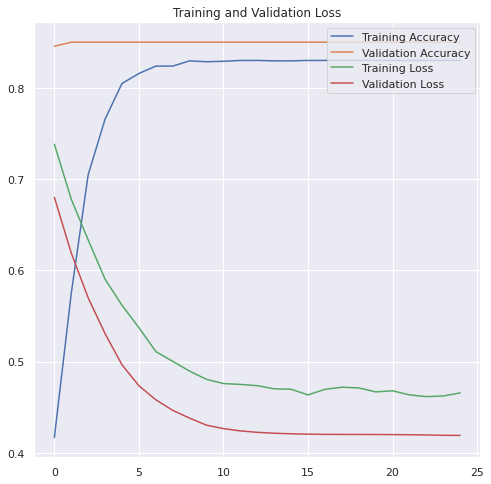

In [110]:
neural_start_time = time.time()
nn_model = Sequential()
nn_model.add(Dense(units=1000, activation='sigmoid', input_shape=(30,)))
nn_model.add(Dropout(0.1))
nn_model.add(Dense(units=100, activation='relu'))
nn_model.add(Dropout(0.1))
nn_model.add(Dense(units=100, activation='relu'))
nn_model.add(Dropout(0.1))
nn_model.add(Dense(units=100, activation='relu'))
nn_model.add(Dropout(0.1))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.summary()

#FIT MODEL
learning_rate=0.09
nn_model.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])
history = nn_model.fit(X_train, y_train,batch_size=17,epochs=25,verbose=1,validation_data=(X_test, y_test))

#EVALUATE MODEL
score = nn_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#PLOT THE RESULT
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **DECISION TREE CLASSIFIER**

**BUILDING THE DECISION TREE MODEL**

In [157]:
# Create Decision Tree classifer object
decision1_model = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
decision1_model = decision1_model.fit(X_train,y_train)

#Predict the response for test dataset
y_test_pred = decision1_model.predict(X_test)

# Create Decision Tree classifer object
decision1_model = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
decision1_model = decision1_model.fit(X_test,y_test)

#Predict the response for train dataset
y_train_pred = decision1_model.predict(X_train)

**EVALUATE THE MODEL**

In [158]:
#Comparing actual test set values and predicted values

# Model Accuracy
decision1_train_Accuracy=metrics.accuracy_score(y_train, y_train_pred)
decision1_test_Accuracy=metrics.accuracy_score(y_test, y_test_pred)

print("Decision Train Accuracy:",decision1_train_Accuracy)
print("Decision Test Accuracy:",decision1_test_Accuracy)


Decision Train Accuracy: 0.9428571428571428
Decision Test Accuracy: 0.9522222222222222


**PLOT THE RESULT**

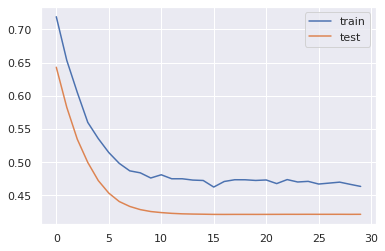

In [159]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(history.history['loss'], label='train')

plt.plot(history.history['val_loss'], label='test')

plt.legend()

plt.show()

In [160]:
dot_data = tree.export_graphviz(decision1_model, out_file=None,
feature_names=['Time','v1','v2','v3','v4','v5','v6','v7','v7','v9','v10','v11','v12','v13','v14','v15','v16','v17','v18','v19','v20','v21','v22','v23','v24','v25','v26','v27','v29','Amount',],
class_names=list(['Time','v1','v2','v3','v4','v5','v6','v7','v7','v9','v10','v11','v12','v13','v14','v15','v16','v17','v18','v19','v20','v21','v22','v23','v24','v25','v26','v27','v29','Amount',]),
filled=True)

# Draw graph
graph1 = graphviz.Source(dot_data, format="png")
graph1

#download image
graph.render("decision_tree1_graphivz")
files.download("decision_tree1_graphivz.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **NAIVE BAYES CLASSIFIER**

**BUILD THE NAIVE BAYES MODEL**

In [165]:
# Init the Gaussian Classifier
nb1_model = GaussianNB()

# Train the model 
nb1_model.fit(X_train, y_train)

# Predict Output 
y_naive1_pred_test = nb1_model.predict(X_test)

# Init the Gaussian Classifier
train1_model = GaussianNB()

# Train the model 
train1_model.fit(X_test, y_test)

# Predict Output 
y_naive1_pred_train = train1_model.predict(X_train)

**EVALUATE THE MODEL**

In [166]:
# Model Accuracy
naive1_train_Accuracy=metrics.accuracy_score(y_train, y_naive1_pred_train)
naive1_test_Accuracy=metrics.accuracy_score(y_test, y_naive1_pred_test)

print("Naive Test Accuracy:",naive1_train_Accuracy)
print("Naive Train Accuracy:",naive1_test_Accuracy)

Naive Test Accuracy: 0.94
Naive Train Accuracy: 0.9477777777777778


**PLOT THE RESULT**

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       765
           1       0.93      0.70      0.80       135

    accuracy                           0.95       900
   macro avg       0.94      0.85      0.89       900
weighted avg       0.95      0.95      0.94       900



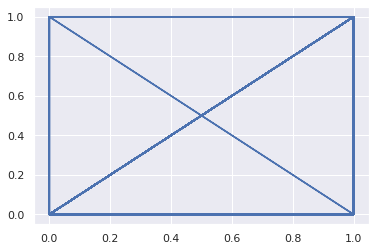

In [169]:
print(metrics.classification_report(y_test, y_naive1_pred_test))
plt.plot(y_test, y_naive1_pred_test)

plt.show()

# **RANDOM FOREST CLASSIFIER**

**BUILD THE MODEL**

In [170]:
#Create a Random Forest Classifier

clf1=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)

clf1.fit(X_train,y_train)

y_pred1=clf1.predict(X_test)

# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))


Accuracy: 0.9744444444444444


**PLOT THE RESULT**

Accuracy: 0.9744444444444444


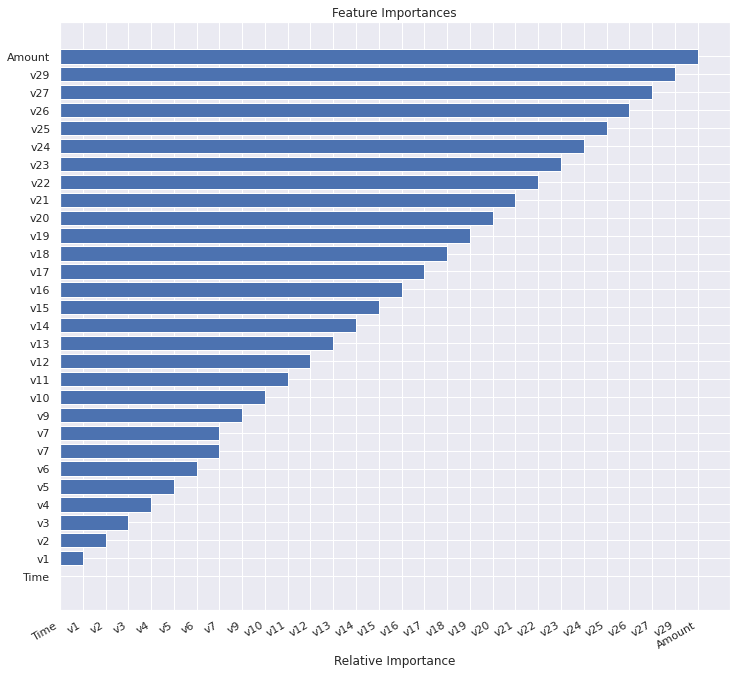

In [171]:
# plot training history

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
plot_randomforest=plt.figure(figsize=(12,12))
plot_randomforest=plt.title('Feature Importances')

plot_randomforest=plt.barh(range(len(['Time','v1','v2','v3','v4','v5','v6','v7','v7','v9','v10','v11','v12','v13','v14','v15','v16','v17','v18','v19','v20','v21','v22','v23','v24','v25','v26','v27','v29','Amount',])), ['Time','v1','v2','v3','v4','v5','v6','v7','v7','v9','v10','v11','v12','v13','v14','v15','v16','v17','v18','v19','v20','v21','v22','v23','v24','v25','v26','v27','v29','Amount'], color='b', align='center')
plot_randomforest=plt.yticks(range(len(['Time','v1','v2','v3','v4','v5','v6','v7','v7','v9','v10','v11','v12','v13','v14','v15','v16','v17','v18','v19','v20','v21','v22','v23','v24','v25','v26','v27','v29','Amount',])), ['Time','v1','v2','v3','v4','v5','v6','v7','v7','v9','v10','v11','v12','v13','v14','v15','v16','v17','v18','v19','v20','v21','v22','v23','v24','v25','v26','v27','v29','Amount',])
plot_randomforest=plt.xlabel('Relative Importance')
plot_randomforest.get_figure().autofmt_xdate()

In [14]:
table=[['CLASSIFIERS','ACCURACY WITHOUT SAMPLING ','ACCURACY WITH SAMPLING'],
       ['NEURAL NETWORK','99.82','85.00'],
       ['DECISION TREE','99.93','95.22'],
       ['NAIVE BAYES','99.30','94.00'],
       ['RANDOM FOREST','99.95','97.44']]

print(tabulate(table,headers='firstrow',tablefmt='fancy_grid',disable_numparse=True,numalign="right"))

╒════════════════╤══════════════════════════════╤══════════════════════════╕
│ CLASSIFIERS    │ ACCURACY WITHOUT SAMPLING    │ ACCURACY WITH SAMPLING   │
╞════════════════╪══════════════════════════════╪══════════════════════════╡
│ NEURAL NETWORK │ 99.82                        │ 85.00                    │
├────────────────┼──────────────────────────────┼──────────────────────────┤
│ DECISION TREE  │ 99.93                        │ 95.22                    │
├────────────────┼──────────────────────────────┼──────────────────────────┤
│ NAIVE BAYES    │ 99.30                        │ 94.00                    │
├────────────────┼──────────────────────────────┼──────────────────────────┤
│ RANDOM FOREST  │ 99.95                        │ 97.44                    │
╘════════════════╧══════════════════════════════╧══════════════════════════╛


# **CLASSIFIERS OUTCOME SUMMARY**

# **HYPER PARAMETER TUNNING SUMMARY**

In [9]:
table=[['METHODS','LAYERS','ACTIVATION','LEARNING RATE','OPTIMIZER','EPOCHS','BATCH SIZE','ACCURACY','LOSS'],
       ['1','3','relu,relu,sigmoid','0.01','adam','5','16','83.99','52.86'],
       ['2','5','sigmoid,sigmoid,sigmoid,sigmoid,sigmoid','0.3','adadelta','20','16',"85.00",'47.24'],
       ['3','5','relu,sigmoid,sigmoid,sigmoid,sigmoid','n/a','adam','20','16','85.00','42.37'],
       ['4','3','sigmoid,sigmoid,sigmoid','n/a','adadelta','10','16','85.00','42.30'],
       ['5','5','sigmoid,relu,relu,relu,sigmoid','0.09','adadelta','25','17','85.00','41.90']]

print(tabulate(table,headers='firstrow',tablefmt='fancy_grid',disable_numparse=True,numalign="right"))

╒═══════════╤══════════╤═════════════════════════════════════════╤═════════════════╤═════════════╤══════════╤══════════════╤════════════╤════════╕
│ METHODS   │ LAYERS   │ ACTIVATION                              │ LEARNING RATE   │ OPTIMIZER   │ EPOCHS   │ BATCH SIZE   │ ACCURACY   │ LOSS   │
╞═══════════╪══════════╪═════════════════════════════════════════╪═════════════════╪═════════════╪══════════╪══════════════╪════════════╪════════╡
│ 1         │ 3        │ relu,relu,sigmoid                       │ 0.01            │ adam        │ 5        │ 16           │ 83.99      │ 52.86  │
├───────────┼──────────┼─────────────────────────────────────────┼─────────────────┼─────────────┼──────────┼──────────────┼────────────┼────────┤
│ 2         │ 5        │ sigmoid,sigmoid,sigmoid,sigmoid,sigmoid │ 0.3             │ adadelta    │ 20       │ 16           │ 85.00      │ 47.24  │
├───────────┼──────────┼─────────────────────────────────────────┼─────────────────┼─────────────┼──────────┼─────────

In [7]:
tableDf=pd.DataFrame({'CLASSIFIERS' : ['NEURAL NETWORK', 'DECISION TREE' , 'NAIVE BAYES', 'RANDOM FOREST'],
'ACCURACY WITHOUT SAMPLING' : [99.82,99.93, 99.30, 99.95],
'ACCURACY WITH SAMPLING' : [85.00, 95.22,94.00, 97.44]})
tableDf

,CLASSIFIERS,ACCURACY WITHOUT SAMPLING,ACCURACY WITH SAMPLING
0,NEURAL NETWORK,99.82,85.00
1,DECISION TREE,99.93,95.22
2,NAIVE BAYES,99.30,94.00
3,RANDOM FOREST,99.95,97.44


[Text(0.5, 1.0, 'CLASSIFIERS vs ACCURACY WITHOUT SAMPLING')]

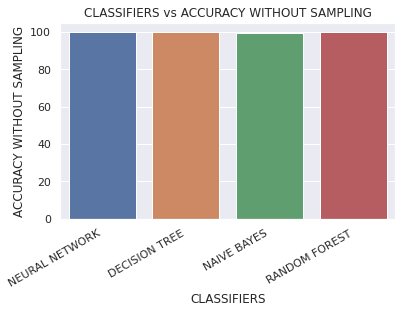

In [8]:
plot=sns.barplot(x='CLASSIFIERS',y='ACCURACY WITHOUT SAMPLING',data=tableDf)
plot.get_figure().autofmt_xdate()
plot.set(title='CLASSIFIERS vs ACCURACY WITHOUT SAMPLING')

[Text(0.5, 1.0, 'CLASSIFIERS vs ACCURACY WITH SAMPLING')]

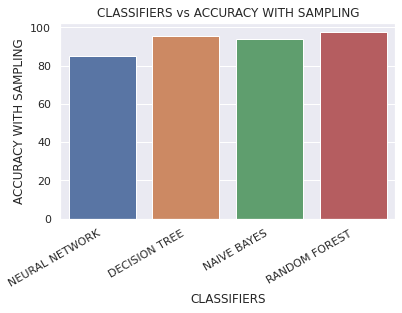

In [9]:
plot=sns.barplot(x='CLASSIFIERS',y='ACCURACY WITH SAMPLING',data=tableDf)
plot.get_figure().autofmt_xdate()
plot.set(title='CLASSIFIERS vs ACCURACY WITH SAMPLING')

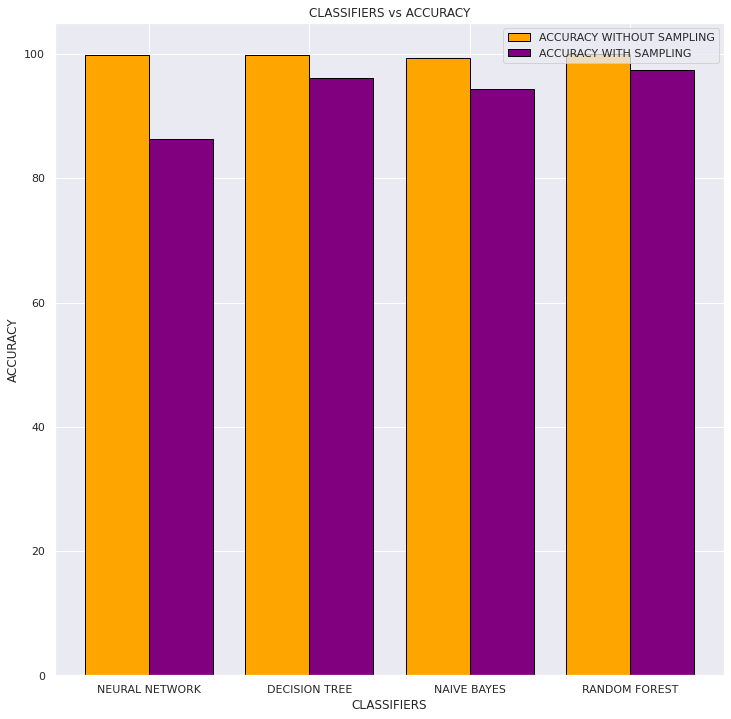

In [6]:
plt.figure(figsize=(12,12))
plt.bar(np.arange(len(tableDf['CLASSIFIERS']))- 0.2, tableDf['ACCURACY WITHOUT SAMPLING'], 0.4, label = 'ACCURACY WITHOUT SAMPLING',color = 'orange',edgecolor = 'black',)
plt.bar(np.arange(len(tableDf['CLASSIFIERS'])) + 0.2, tableDf['ACCURACY WITH SAMPLING'], 0.4, label = 'ACCURACY WITH SAMPLING',color = 'purple',edgecolor = 'black',)
plot.get_figure().autofmt_xdate()
plt.xticks(np.arange(len(tableDf['CLASSIFIERS'])), tableDf['CLASSIFIERS'])
plt.xlabel("CLASSIFIERS")
plt.ylabel("ACCURACY")
plt.title("CLASSIFIERS vs ACCURACY")
plt.legend()
plt.show()